In [9]:
%%time
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pca import pca

# Function to convert into numpy array
def to_array(List):
    l = np.array(List)
    l = l.flatten()
    return l 

# Outlier masking function to remove outliers
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff.astype(float))
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

Wall time: 0 ns


In [2]:
%%time
# Importing the dataset
df = pd.read_csv('Robust_Scaled.csv', low_memory=False)

# Drop the unwanted column
df = df.drop(columns = ['Unnamed: 0'])
df

Wall time: 28.6 s


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
0,2010.05.02_00:00:00_TAI,1,11067,11067,-65.205566,24.177683,0.431914,0.173426,0.407741,0.274315,...,-0.230618,2010-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010.05.02_00:12:00_TAI,1,11067,11067,-64.984444,24.106541,0.438265,0.177587,0.411025,0.617566,...,-0.364324,2010-05-02 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010.05.02_00:24:00_TAI,1,11067,11067,-64.888580,24.135088,0.464960,0.185259,0.431423,0.594062,...,-0.351642,2010-05-02 00:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.05.02_00:36:00_TAI,1,11067,11067,-64.758209,24.144226,0.474002,0.218677,0.440990,0.475601,...,-0.299244,2010-05-02 00:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010.05.02_00:48:00_TAI,1,11067,11067,-64.534355,24.097631,0.510769,0.256765,0.575643,0.179632,...,-0.182030,2010-05-02 00:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651015,2021.12.30_23:12:00_TAI,7912,12923,12923,37.216583,-28.806856,-0.236217,-0.102187,-0.244133,-0.221606,...,0.253028,2021-12-30 23:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651016,2021.12.30_23:24:00_TAI,7912,12923,12923,37.328621,-28.814804,-0.229918,-0.100139,-0.236267,-0.246687,...,-0.018686,2021-12-30 23:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651017,2021.12.30_23:36:00_TAI,7912,12923,12923,37.393547,-28.820169,-0.221924,-0.097421,-0.225549,-0.204925,...,-0.418455,2021-12-30 23:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651018,2021.12.30_23:48:00_TAI,7912,12923,12923,37.471878,-28.819061,-0.220019,-0.097749,-0.222000,-0.208777,...,-0.362545,2021-12-30 23:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Using pca library

In [83]:
%%time
x = df[cols]

# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(x)
Scaled_data=scaling.transform(x)

# Initialize
model = pca(n_components=0.95)
model = pca(n_components=18)

# Fit transform
out = model.fit_transform(Scaled_data)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [18] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[18]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
Wall time: 8min 29s


In [84]:
# Top features of each PC
dataframe = out['topfeat']
feat = []

for i in dataframe['feature']:
    feat.append(cols[int(i) - 1])
    
dataframe['feature'] = feat
dataframe

,PC,feature,loading,type
0,PC1,MEANPOT,-0.364623,best
1,PC2,TOTUSJZ,0.411280,best
2,PC3,MEANGBH,-0.598927,best
3,PC4,AREA_ACR,-0.485993,best
4,PC5,MEANALP,0.994229,best
5,PC6,R_VALUE,-0.840960,best
6,PC7,MEANPOT,0.519831,best
7,PC8,MEANGBH,-0.626952,best
8,PC9,MEANJZH,-0.625122,best
9,PC10,MEANPOT,0.608867,best


(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Cumulative explained variance\n 18 Principal Components explain [99.99%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

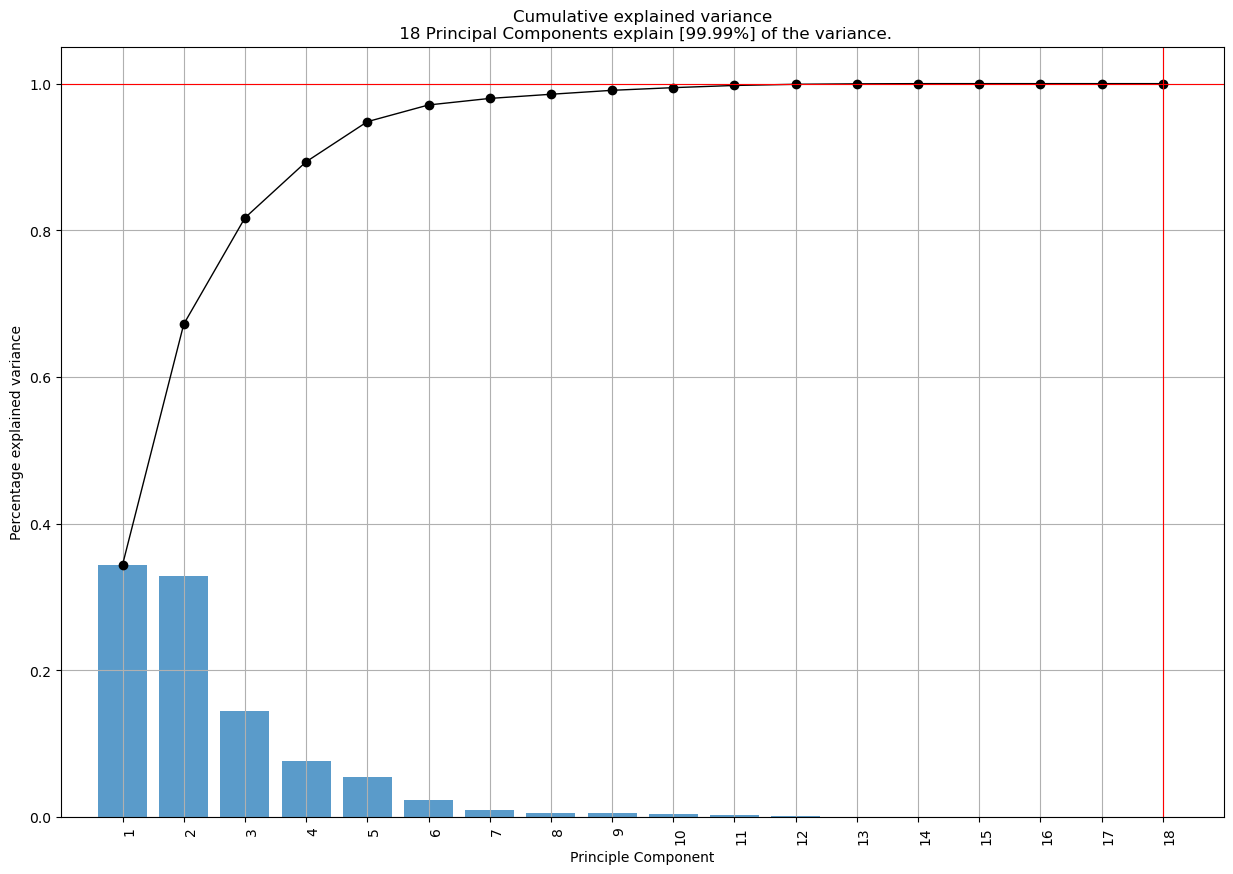

In [85]:
# Var relevance plot
model.plot()

## Using sklearn.decomposition.PCA

In [16]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
# construct a dataframe using pandas
df1=df[cols]
 
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
 
# Set the n_components=18
principal=PCA(n_components=18)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(2651020, 18)


In [53]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[-3.19007213e-01,  4.88157488e-03,  4.90612720e-03,
         4.88157338e-03,  4.90627488e-03, -3.10886502e-01,
        -3.12148239e-01, -3.64622698e-01, -3.64108155e-01,
        -3.59359970e-01, -3.25498468e-01, -3.32423957e-01,
         4.78092257e-03,  2.20897957e-01, -3.46569727e-03,
        -2.72348685e-02,  2.08175038e-01, -4.82776477e-03],
       [ 3.90783825e-03,  4.08032308e-01,  4.11222896e-01,
         4.08032144e-01,  4.11279749e-01,  3.74274056e-03,
         3.77215707e-03,  4.41405530e-03,  4.37782780e-03,
         4.28311739e-03,  3.87228324e-03,  3.93126409e-03,
         4.03673394e-01, -2.41525958e-03, -7.45278634e-04,
         4.98119918e-04, -2.26683715e-03, -4.07024775e-01],
       [ 2.61505375e-02,  1.77577856e-04,  1.66995441e-04,
         1.77578188e-04,  1.66558800e-04,  1.16582671e-01,
         3.52314156e-03, -9.66568253e-02, -1.43910229e-01,
        -1.42631225e-01, -2.98137961e-01, -1.07167955e-02,
         1.32056369e-04, -4.86063681e-01,  9.61114313e

In [54]:
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[3.44180986e-01 3.27931744e-01 1.44912508e-01 7.64298471e-02
 5.46812831e-02 2.27723150e-02 8.91834672e-03 5.67405795e-03
 5.39290002e-03 3.63761219e-03 2.97845020e-03 1.60583985e-03
 6.07921971e-04 2.69653780e-04 6.53423269e-06 4.61525188e-11
 6.56384532e-16 7.37426655e-25]


In [69]:
# Scoring with score = sum(abs(eigen * var_relevance))
skor = []

for features in range(18):
    eigen = principal.components_[:,features]
    sco = 0
    for i in range(18):
            variance = principal.explained_variance_ratio_[i]
            sco += (abs(variance * eigen[i]))
    skor.append(sco)

skor

[0.16476093128920602,
 0.13782934594731075,
 0.1373045226463673,
 0.1378293447085071,
 0.13726119157571073,
 0.16955466381352288,
 0.15746670210685992,
 0.16998555386248007,
 0.17470845373881205,
 0.17584186430428939,
 0.18214007738968105,
 0.14171483509850655,
 0.13749244906793434,
 0.17074795830326517,
 0.07345529856780504,
 0.11093565350321578,
 0.16993653048732107,
 0.13779109965707279]

In [72]:
dat = {'Feature': cols,
        'Score': skor}
  
# Create DataFrame
feature_scoring = pd.DataFrame(dat)
  
# Print the output.
feature_scoring

,Feature,Score
0,TOTPOT,0.164761
1,ABSNJZH,0.137829
2,SAVNCPP,0.137305
3,TOTUSJH,0.137829
4,TOTUSJZ,0.137261
5,USFLUX,0.169555
6,AREA_ACR,0.157467
7,MEANPOT,0.169986
8,SHRGT45,0.174708
9,MEANSHR,0.175842


In [79]:
%%time
# See at variance
variance_feature = []
for i in cols:
    DATA = to_array(df[i])
    filtered = DATA[~is_outlier(DATA)]
    variance_feature.append(np.var(filtered))
    
feature_scoring['var'] = variance_feature
feature_scoring

<timed exec>:43: RuntimeWarning: divide by zero encountered in true_divide
<timed exec>:43: RuntimeWarning: invalid value encountered in true_divide


Wall time: 2.19 s


,Feature,Score,var
0,TOTPOT,0.164761,0.015620
1,ABSNJZH,0.137829,0.085178
2,SAVNCPP,0.137305,0.176083
3,TOTUSJH,0.137829,0.112729
4,TOTUSJZ,0.137261,0.126442
5,USFLUX,0.169555,0.103646
6,AREA_ACR,0.157467,0.144175
7,MEANPOT,0.169986,0.080412
8,SHRGT45,0.174708,0.085330
9,MEANSHR,0.175842,0.337739


In [80]:
# Sorting by score
feature_scoring.sort_values(by='Score', ascending=False)

,Feature,Score,var
10,MEANGAM,0.182140,0.363153
9,MEANSHR,0.175842,0.337739
8,SHRGT45,0.174708,0.085330
13,MEANGBT,0.170748,0.392809
7,MEANPOT,0.169986,0.080412
16,MEANGBZ,0.169937,0.433896
5,USFLUX,0.169555,0.103646
0,TOTPOT,0.164761,0.015620
6,AREA_ACR,0.157467,0.144175
11,R_VALUE,0.141715,0.000000


In [81]:
# Sorting by variance
feature_scoring.sort_values(by='var', ascending=False)

,Feature,Score,var
14,MEANALP,0.073455,0.750432
12,MEANJZH,0.137492,0.712479
17,MEANJZD,0.137791,0.689061
15,MEANGBH,0.110936,0.449575
16,MEANGBZ,0.169937,0.433896
13,MEANGBT,0.170748,0.392809
10,MEANGAM,0.182140,0.363153
9,MEANSHR,0.175842,0.337739
2,SAVNCPP,0.137305,0.176083
6,AREA_ACR,0.157467,0.144175
